# Importaciones
Esta sección se encarga de importar todas las librerías necesarias para la ejecución del collab.

In [ ]:
#Importar librerías
import gdown
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
import copy

# Invocación del DataSet desde drive
Esta sección se encarga de invocar desde Google Drive al Dataset unificado creado previamente con el collab *ETL*.

In [ ]:
#Invocación del archivo csv unificado
url_unificado = 'https://drive.google.com/uc?export=download&id=1Rp6yU1ESYtOe9ENxbEwun0EYXFPufhQB'
output_unificado = 'data_unificado.csv'
gdown.download(url_unificado, output_unificado, quiet=False)

#Carga del archivo csv al dataframe df_2022
df = pd.read_csv(output_unificado,sep=',')
df.head(10)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Rp6yU1ESYtOe9ENxbEwun0EYXFPufhQB
To: /content/data_unificado.csv
100%|██████████| 23.3M/23.3M [00:00<00:00, 57.9MB/s]


,cod_provincia,sector,ambito,sexo,vive_padre,vive_hermano,habitaciones_en_casa,tiene_auto,tiene_computadora,tiene_tablet,...,motivo_faltas_problemas_clima,motivo_faltas_otros,conflicto_trado_adultos,conflicto_tratado_involucrados,conflicto_tratado_sanciones,lpuntaje,mpuntaje,padres_extranjeros,personas_en_casa,edad
0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,732.87598,689.06610,1.0,4.0,18.0
1,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,724.97174,531.92725,1.0,4.0,17.0
2,2.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,710.52643,522.57239,1.0,4.0,17.0
3,2.0,2.0,1.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,660.88525,482.08847,1.0,3.0,18.0
4,2.0,2.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,485.50897,339.57428,1.0,3.0,17.0
5,2.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,483.88834,444.86670,1.0,5.0,18.0
6,2.0,2.0,1.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,662.36121,592.93756,1.0,2.0,17.0
7,2.0,2.0,1.0,1.0,1.0,1.0,4.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,613.61072,676.67151,1.0,4.0,18.0
8,2.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,532.23883,590.25348,1.0,2.0,17.0
9,2.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,527.16089,679.99890,1.0,3.0,19.0


In [ ]:
# Mostrar cantidad de filas del dataframe df
df.shape[0]

151625

#Generación del modelo "Resultados matemáticas"
En esta sección se generan cuatro modelos -Arbol de decisión, Adaboost, Modelo de bosque aleatorio y regresión logística- para predecir si la variable mpuntaje es superior o no al promedio.

##Preparación del dataset
En esta sección se adapta al dataframe para entrenar el modelo de mpuntaje a partir del dataframe unificado.

**Identificar la variable objetivo**

Se elimina la columna lpuntaje, renombrando la columna mpuntaje a "y" y transformandola en un valor binario (0 si es menor que el promedio y 1 si es mayor que el promedio).

In [ ]:
def clasificar_puntaje(mpuntaje):
  if mpuntaje < 400:
    return 0
  elif 400 <= mpuntaje <= 500:
    return 1
  elif 500 < mpuntaje <= 600:
    return 2
  else:
    return 3


#Creo una copia del dataframe para trabajar en el modelo de mpuntaje
df_mpuntaje = df.copy()

#Identifico la variable como mpuntaje y la renombro como y
df_mpuntaje['y'] = df['mpuntaje'].apply(lambda x: 1 if x >= 500 else 0) #Si es modelo binario
#df_mpuntaje['y'] = df_mpuntaje['mpuntaje'].apply(clasificar_puntaje)

#Borra la columna clase binaria que fue reemplazada
df_mpuntaje.drop('mpuntaje', axis=1, inplace=True)

#Eliminar la columna lpuntaje, que no será utilizada en este dataframe
df_mpuntaje.drop('lpuntaje', axis=1, inplace=True)

In [ ]:
#Obtengo la descripción
df_mpuntaje.describe()

,cod_provincia,sector,ambito,sexo,vive_padre,vive_hermano,habitaciones_en_casa,tiene_auto,tiene_computadora,tiene_tablet,...,motivo_faltas_ganas,motivo_faltas_problemas_clima,motivo_faltas_otros,conflicto_trado_adultos,conflicto_tratado_involucrados,conflicto_tratado_sanciones,padres_extranjeros,personas_en_casa,edad,y
count,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,...,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000
mean,32.212089,1.338882,1.456752,1.514678,0.651291,0.771805,3.318127,0.683568,0.784996,0.364993,...,0.351908,0.276498,0.360706,0.304020,0.624508,0.518681,0.577411,4.589461,17.693388,0.345233
std,29.976258,0.473331,0.498128,0.499786,0.476563,0.419670,1.325189,0.465085,0.410827,0.481430,...,0.477567,0.447267,0.480207,0.459993,0.484251,0.499653,0.493973,1.584232,0.832237,0.475446
min,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
25%,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,17.000000,0.000000
50%,14.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,18.000000,0.000000
75%,58.000000,2.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,18.000000,1.000000
max,94.000000,2.000000,2.000000,2.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,21.000000,1.000000


**Balancear el modelo**

*Se balancea el modelo para que contenga la misma cantidad de alumnos que superaron o no superaron al promedio.*

In [ ]:
# Mostrar cuantos valores en la columna "y" valen 0 o 1
print(df_mpuntaje['y'].value_counts())

y
0    99279
1    52346
Name: count, dtype: int64


In [ ]:
# Contar la cantidad de 0 y 1 en la columna 'y'
conteo_clases = df_mpuntaje['y'].value_counts()
# Calcular cuántos 0 eliminar para reducir a 52346
cantidad_a_eliminar = conteo_clases[0] - 52346

# Obtener los índices de las filas con 'y' igual a 0
indices_ceros = df_mpuntaje[df_mpuntaje['y'] == 0].index

# Seleccionar aleatoriamente los índices a eliminar
indices_a_eliminar = np.random.choice(indices_ceros, cantidad_a_eliminar, replace=False)

# Eliminar las filas seleccionadas del DataFrame
df_mpuntaje = df_mpuntaje.drop(indices_a_eliminar)

# Verificar el nuevo conteo de clases
print(df_mpuntaje["y"].value_counts())

y
1    52346
0    52346
Name: count, dtype: int64


**Detectar columnas irrelevantes**

Se detectan y eliminan todas las columnas que contengan un bajo nivel de correlación con la variable objetivo

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_mpuntaje.corr()

# Get the correlation with the target variable 'y'
correlation_with_y = correlation_matrix['y']

# Find columns with absolute correlation less than 0.1
columns_to_drop = correlation_with_y[abs(correlation_with_y) < 0.05].index

# Print the columns to be dropped and their correlation values
print("Columns to be dropped:")
for col in columns_to_drop:
    print(f"{col}: {correlation_with_y[col]}")

# Drop the columns from the DataFrame
df_mpuntaje = df_mpuntaje.drop(columns=columns_to_drop)

Columns to be dropped:
vive_padre: 0.0496270250625867
vive_hermano: 0.022516177279761008
tiene_tablet: 0.045344863731963815
cuida_familiar: -0.0383658920503766
realiza_tareas_hogar: 4.575434239172405e-05
dias_trabajo_fuera_casa: 0.028625665323298233
fuera_escuela_leer: 0.0437235498984766
fuera_escuela_deporte: 0.029966577603127754
faltas: -0.03406812190686941
motivo_faltas_problemas_clima: -0.0015618054472304114
conflicto_trado_adultos: -0.0014750310855353162
conflicto_tratado_sanciones: 0.036667002012888424
padres_extranjeros: 0.047410167543105286


**División del dataset en entrenamiento y prueba**

Se divide al dataset en cuatro secciones destinadas al entrenamiento y prueba del modelo, tanto para los valores de entrada como de salida.

In [ ]:
#X es la caracteristica, y es la variable objetivo
Xm = df_mpuntaje.drop('y', axis=1)
ym = df_mpuntaje['y']

#Dividi,os el conjunto de datos en entrenamiento y prueba
X_mtrain, X_mtest, y_mtrain, y_mtest = train_test_split(Xm, ym, test_size=0.2, random_state=42)

# Mostrar cantidad de datos que tiene el conjunto de entrenamiento y de prueba
print("Tamaño del conjunto de entrenamiento:", X_mtrain.shape[0])
print("Tamaño del conjunto de prueba:", X_mtest.shape[0])

Tamaño del conjunto de entrenamiento: 83753
Tamaño del conjunto de prueba: 20939


## Aprendizaje supervisado
En esta sección se define y entrenan los cuatro modelos de aprendizaje capaz de predecir si un alumno supera el puntaje promedio en el examen de matemáticas.

###Entrenamiento de los modelos
Aquí se entrenan los modelos para la predicción del examen de matemáticas

**Modelo Arbol de decisión**

Aquí se entrena un modelo de Arbol de decisión continuamente hasta encontrar el mejor posible. Al tratarse del primer modelo, presentamos un gráfico que meustra como cambian sus capacidades con un gráfico.

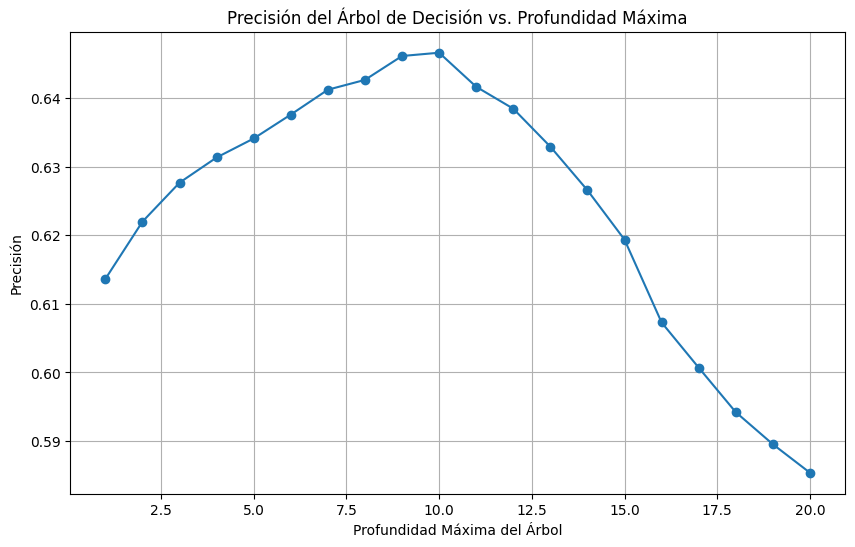

In [ ]:
# Graficar como se modifican los valores de max_depth por cuestiones didacticas.

# Lista para almacenar las profundidades máximas y las precisiones
max_depths = list(range(1, 21))  # Profundidades de 1 a 20
accuracies = []

for max_depth in max_depths:
    # Crear y entrenar el modelo de árbol de decisión
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_mtrain, y_mtrain)

    # Realizar predicciones en el conjunto de prueba
    y_pred = clf.predict(X_mtest)

    # Calcular la precisión
    accuracy = accuracy_score(y_mtest, y_pred)
    accuracies.append(accuracy)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel("Profundidad Máxima del Árbol")
plt.ylabel("Precisión")
plt.title("Precisión del Árbol de Decisión vs. Profundidad Máxima")
plt.grid(True)
plt.show()

In [ ]:
# Lista para almacenar las profundidades máximas y las métricas
max_depths = list(range(1, 21))  # Profundidades de 1 a 20
best_accuracy = 0
best_precision = 0
best_f1 = 0
best_recall = 0
best_max_depth = 0

for max_depth in max_depths:
    # Crear y entrenar el modelo de árbol de decisión
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_mtrain, y_mtrain)

    # Realizar predicciones en el conjunto de prueba
    y_pred = clf.predict(X_mtest)

    # Calcular las métricas
    accuracy = accuracy_score(y_mtest, y_pred)
    precision = precision_score(y_mtest, y_pred)
    f1 = f1_score(y_mtest, y_pred)
    recall = recall_score(y_mtest, y_pred)

    print(f"Resultados para max_depth={max_depth}:")
    print(f"  Precisión: {precision}")
    print(f"  Exactitud: {accuracy}")
    print(f"  F1-score: {f1}")
    print(f"  Recall: {recall}")

    # Actualizar la mejor profundidad si se encuentran mejores métricas
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_precision = precision
        best_f1 = f1
        best_recall = recall
        best_max_depth = max_depth
        clf_copy = copy.deepcopy(clf)

print("\nMejores resultados:")
print(f"  Max Depth: {best_max_depth}")
print(f"  Precisión: {best_precision}")
print(f"  Exactitud: {best_accuracy}")
print(f"  F1-score: {best_f1}")
print(f"  Recall: {best_recall}")
clf = clf_copy

Resultados para max_depth=1:
  Precisión: 0.6568690095846645
  Exactitud: 0.6136396198481303
  F1-score: 0.5596080566140447
  Recall: 0.4874348032242769
Resultados para max_depth=2:
  Precisión: 0.6215566648178961
  Exactitud: 0.6219972300491905
  F1-score: 0.6294996021158077
  Recall: 0.6376481744902798
Resultados para max_depth=3:
  Precisión: 0.6318718219322652
  Exactitud: 0.6276804049859115
  F1-score: 0.628195345288058
  Recall: 0.624561403508772
Resultados para max_depth=4:
  Precisión: 0.6564091210980739
  Exactitud: 0.631357753474378
  F1-score: 0.605751059808979
  Recall: 0.5623518255097203
Resultados para max_depth=5:
  Precisión: 0.6487825010317788
  Exactitud: 0.6341277042838722
  F1-score: 0.6214359835944063
  Recall: 0.5963015647226173
Resultados para max_depth=6:
  Precisión: 0.620467693310519
  Exactitud: 0.6376140216820287
  F1-score: 0.6674555175738452
  Recall: 0.7221431958274064
Resultados para max_depth=7:
  Precisión: 0.6307891332470893
  Exactitud: 0.64124361239

**Modelo ADABOOST**

Aquí se entrena un modelo de ADABOOST (con el previo arbol de decisión como base) continuamente hasta encontrar el mejor posible.

In [ ]:
# Lista para almacenar los hiperparámetros y las métricas
n_estimators_list = [50, 100, 150]  # Número de estimadores (árboles)
learning_rates = [0.1, 0.5, 1.0]  # Tasa de aprendizaje

best_accuracy = 0
best_precision = 0
best_f1 = 0
best_recall = 0
best_n_estimators = 0
best_learning_rate = 0

for n_estimators in n_estimators_list:
  for learning_rate in learning_rates:
    # Crear el modelo AdaBoost con el clasificador de árbol de decisión como estimador base
    ada_clf = AdaBoostClassifier(estimator=clf,
                                 n_estimators=n_estimators,
                                 learning_rate=learning_rate,
                                 random_state=42)

    # Entrenar el modelo AdaBoost
    ada_clf.fit(X_mtrain, y_mtrain)

    # Realizar predicciones en el conjunto de prueba
    y_pred_ada = ada_clf.predict(X_mtest)

    # Calcular las métricas del modelo AdaBoost
    accuracy_ada = accuracy_score(y_mtest, y_pred_ada)
    precision_ada = precision_score(y_mtest, y_pred_ada)
    f1_ada = f1_score(y_mtest, y_pred_ada)
    recall_ada = recall_score(y_mtest, y_pred_ada)

    print(f"Resultados para n_estimators={n_estimators}, learning_rate={learning_rate}:")
    print(f"  Precisión: {precision_ada}")
    print(f"  Exactitud: {accuracy_ada}")
    print(f"  F1-score: {f1_ada}")
    print(f"  Recall: {recall_ada}")

    # Actualizar los mejores hiperparámetros si se encuentran mejores métricas
    if accuracy_ada > best_accuracy:
        best_accuracy = accuracy_ada
        best_precision = precision_ada
        best_f1 = f1_ada
        best_recall = recall_ada
        best_n_estimators = n_estimators
        best_learning_rate = learning_rate
        ada_clf_copy = copy.deepcopy(ada_clf)


print("\nMejores resultados:")
print(f"  n_estimators: {best_n_estimators}")
print(f"  learning_rate: {best_learning_rate}")
print(f"  Precisión: {best_precision}")
print(f"  Exactitud: {best_accuracy}")
print(f"  F1-score: {best_f1}")
print(f"  Recall: {best_recall}")
ada_clf = ada_clf_copy

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=50, learning_rate=0.1:
  Precisión: 0.6495109676194094
  Exactitud: 0.6467835140169063
  F1-score: 0.6490795217308787
  Recall: 0.6486486486486487


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=50, learning_rate=0.5:
  Precisión: 0.6212665406427221
  Exactitud: 0.6189407326042313
  F1-score: 0.6222958579881657
  Recall: 0.6233285917496444


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=50, learning_rate=1.0:
  Precisión: 0.6006250591912113
  Exactitud: 0.5978795548975596
  F1-score: 0.6010235026535254
  Recall: 0.6014224751066857


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=100, learning_rate=0.1:
  Precisión: 0.6464617719597799
  Exactitud: 0.6438702898896795
  F1-score: 0.6463698012993787
  Recall: 0.6462778568041726


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=100, learning_rate=0.5:
  Precisión: 0.6178196863273357
  Exactitud: 0.6133530732126654
  F1-score: 0.6133346069347597
  Recall: 0.60891417733523


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=100, learning_rate=1.0:
  Precisión: 0.6056730769230769
  Exactitud: 0.6013658722957161
  F1-score: 0.6014800668417284
  Recall: 0.5973447131341868


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=150, learning_rate=0.1:
  Precisión: 0.6431484115694642
  Exactitud: 0.640575003581833
  F1-score: 0.6431484115694642
  Recall: 0.6431484115694642


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=150, learning_rate=0.5:
  Precisión: 0.618568665377176
  Exactitud: 0.6134963465303979
  F1-score: 0.6124970074215944
  Recall: 0.6065433854907539


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=150, learning_rate=1.0:
  Precisión: 0.6116871789902122
  Exactitud: 0.6064759539615072
  F1-score: 0.6050613496932515
  Recall: 0.5985775248933144

Mejores resultados:
  n_estimators: 50
  learning_rate: 0.1
  Precisión: 0.6495109676194094
  Exactitud: 0.6467835140169063
  F1-score: 0.6490795217308787
  Recall: 0.6486486486486487


**Modelo bosque aleatorio**

Aquí se entrena un modelo de bosque aleatorio continuamente hasta encontrar el mejor posible.

In [ ]:
# Lista para almacenar los hiperparámetros y las métricas
n_estimators_list = [100, 300, 500]  # Número de árboles
max_depths = [None, 10, 20]  # Profundidad máxima de los árboles
min_samples_splits = [2, 5, 10]  # Mínimo número de muestras para dividir un nodo

best_accuracy = 0
best_precision = 0
best_f1 = 0
best_recall = 0
best_n_estimators = 0
best_max_depth = None
best_min_samples_split = 0

for n_estimators in n_estimators_list:
  for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
      # Crear y entrenar el modelo de Bosque Aleatorio con los hiperparámetros actuales
      rf_clf = RandomForestClassifier(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      random_state=42)
      rf_clf.fit(X_mtrain, y_mtrain)

      # Realizar predicciones en el conjunto de prueba
      rf_y_pred = rf_clf.predict(X_mtest)

      # Calcular las métricas
      rf_accuracy = accuracy_score(y_mtest, rf_y_pred)
      rf_precision = precision_score(y_mtest, rf_y_pred)
      rf_f1 = f1_score(y_mtest, rf_y_pred)
      rf_recall = recall_score(y_mtest, rf_y_pred)

      print(f"Resultados para n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}:")
      print(f"  Precisión: {rf_precision}")
      print(f"  Exactitud: {rf_accuracy}")
      print(f"  F1-score: {rf_f1}")
      print(f"  Recall: {rf_recall}")

      # Actualizar los mejores hiperparámetros si se encuentran mejores métricas
      if rf_accuracy > best_accuracy:
          best_accuracy = rf_accuracy
          best_precision = rf_precision
          best_f1 = rf_f1
          best_recall = rf_recall
          best_n_estimators = n_estimators
          best_max_depth = max_depth
          best_min_samples_split = min_samples_split
          rf_clf_copy = copy.deepcopy(rf_clf)

print("\nMejores resultados:")
print(f"  n_estimators: {best_n_estimators}")
print(f"  max_depth: {best_max_depth}")
print(f"  min_samples_split: {best_min_samples_split}")
print(f"  Precisión: {best_precision}")
print(f"  Exactitud: {best_accuracy}")
print(f"  F1-score: {best_f1}")
print(f"  Recall: {best_recall}")
rf_clf = rf_clf_copy

Resultados para n_estimators=100, max_depth=None, min_samples_split=2:
  Precisión: 0.6578168180023687
  Exactitud: 0.6492669181909356
  F1-score: 0.6447712102157299
  Recall: 0.632232972870423
Resultados para n_estimators=100, max_depth=None, min_samples_split=5:
  Precisión: 0.6627906976744186
  Exactitud: 0.6570036773484884
  F1-score: 0.6557377049180327
  Recall: 0.6488332384746728
Resultados para n_estimators=100, max_depth=None, min_samples_split=10:
  Precisión: 0.6678956049286893
  Exactitud: 0.6618272123788147
  F1-score: 0.6603674037124083
  Recall: 0.6530070195408841
Resultados para n_estimators=100, max_depth=10, min_samples_split=2:
  Precisión: 0.6722689075630253
  Exactitud: 0.6649314675963514
  F1-score: 0.6623026569118213
  Recall: 0.6526275848985013
Resultados para n_estimators=100, max_depth=10, min_samples_split=5:
  Precisión: 0.6702550674037435
  Exactitud: 0.664215101007689
  F1-score: 0.6628302882079317
  Recall: 0.6555682033769683
Resultados para n_estimators=1

**Modelo de regresión logística**

Aquí se entrena un modelo de regresión logística continuamente hasta encontrar el mejor posible.

In [ ]:
# Lista de valores de C a probar
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

best_accuracy = 0
best_precision = 0
best_f1 = 0
best_recall = 0
best_C = 0

for C in C_values:
  # Crear y entrenar el modelo de regresión logística con el valor actual de C
  logreg_clf = LogisticRegression(C=C, max_iter=1000, random_state=42)
  logreg_clf.fit(X_mtrain, y_mtrain)

  # Realizar predicciones en el conjunto de prueba
  logreg_y_pred = logreg_clf.predict(X_mtest)

  # Calcular las métricas
  logreg_accuracy = accuracy_score(y_mtest, logreg_y_pred)
  logreg_precision = precision_score(y_mtest, logreg_y_pred)
  logreg_f1 = f1_score(y_mtest, logreg_y_pred)
  logreg_recall = recall_score(y_mtest, logreg_y_pred)

  print(f"Resultados para C={C}:")
  print(f"  Precisión: {logreg_precision}")
  print(f"  Exactitud: {logreg_accuracy}")
  print(f"  F1-score: {logreg_f1}")
  print(f"  Recall: {logreg_recall}")

  # Actualizar el mejor valor de C si se encuentran mejores métricas
  if logreg_accuracy > best_accuracy:
      best_accuracy = logreg_accuracy
      best_precision = logreg_precision
      best_f1 = logreg_f1
      best_recall = logreg_recall
      best_C = C
      logreg_clf_copy = copy.deepcopy(logreg_clf)

print("\nMejores resultados:")
print(f"  C: {best_C}")
print(f"  Precisión: {best_precision}")
print(f"  Exactitud: {best_accuracy}")
print(f"  F1-score: {best_f1}")
print(f"  Recall: {best_recall}")
logreg_clf = logreg_clf_copy

Resultados para C=0.001:
  Precisión: 0.6600599439234265
  Exactitud: 0.6545202731744592
  F1-score: 0.6536767522022213
  Recall: 0.6474158368895211
Resultados para C=0.01:
  Precisión: 0.6608215462119744
  Exactitud: 0.6549500931276565
  F1-score: 0.6537595246082331
  Recall: 0.6468468468468469
Resultados para C=0.1:
  Precisión: 0.6607835531419706
  Exactitud: 0.6547590620373466
  F1-score: 0.6534017356283263
  Recall: 0.6461830251303936
Resultados para C=1:
  Precisión: 0.6606848384906392
  Exactitud: 0.6546157887196141
  F1-score: 0.6532080176464947
  Recall: 0.6458985301090564
Resultados para C=10:
  Precisión: 0.6608476384443798
  Exactitud: 0.6548068198099241
  F1-score: 0.6534330648254699
  Recall: 0.6461830251303936
Resultados para C=100:
  Precisión: 0.6607506546406751
  Exactitud: 0.6547113042647691
  F1-score: 0.653337169159954
  Recall: 0.6460881934566145

Mejores resultados:
  C: 0.01
  Precisión: 0.6608215462119744
  Exactitud: 0.6549500931276565
  F1-score: 0.6537595246

###Obtener métricas
En esta sección se obtienen todas las métricas de los cuatro modelos para comprobar cual es el mejor

**Matriz de validación**

In [ ]:
# prompt: dame la matriz de validación de cada uno de los modelos para saber cual es la precision de estos

# Matriz de confusión para Árbol de Decisión
confusion_dt = confusion_matrix(y_mtest, y_pred)
print("Matriz de confusión para Árbol de Decisión:")
print(confusion_dt)

# Matriz de confusión para AdaBoost
confusion_ada = confusion_matrix(y_mtest, y_pred_ada)
print("\nMatriz de confusión para AdaBoost:")
print(confusion_ada)

# Matriz de confusión para Random Forest
confusion_rf = confusion_matrix(y_mtest, rf_y_pred)
print("\nMatriz de confusión para Random Forest:")
print(confusion_rf)

# Matriz de confusión para Regresión Logística
confusion_logreg = confusion_matrix(y_mtest, logreg_y_pred)
print("\nMatriz de confusión para Regresión Logística:")
confusion_logreg

Matriz de confusión para Árbol de Decisión:
[[6208 4186]
 [4496 6049]]

Matriz de confusión para AdaBoost:
[[6387 4007]
 [4233 6312]]

Matriz de confusión para Random Forest:
[[6955 3439]
 [3643 6902]]

Matriz de confusión para Regresión Logística:


array([[6896, 3498],
       [3732, 6813]])

**CrossValidation**

In [ ]:
# Lista de modelos a evaluar
modelos = [
    ('Árbol de Decisión', clf),
    ('AdaBoost', ada_clf),
    ('Bosque Aleatorio', rf_clf),
    ('Regresión Logística', logreg_clf)
]

# Bucle para evaluar cada modelo
for nombre_modelo, modelo in modelos:
  scores = cross_val_score(modelo, Xm, ym, cv=5, scoring='accuracy')  # 5-fold cross-validation
  print(f"Resultados de validación cruzada para {nombre_modelo}:")
  print(f"Precisión promedio: {scores.mean():.4f}")
  print(f"Desviación estándar: {scores.std():.4f}")
  print("-" * 40)

Resultados de validación cruzada para Árbol de Decisión:
Precisión promedio: 0.5910
Desviación estándar: 0.0515
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Resultados de validación cruzada para AdaBoost:
Precisión promedio: 0.5786
Desviación estándar: 0.0558
----------------------------------------
Resultados de validación cruzada para Bosque Aleatorio:
Precisión promedio: 0.5993
Desviación estándar: 0.0613
----------------------------------------
Resultados de validación cruzada para Regresión Logística:
Precisión promedio: 0.6363
Desviación estándar: 0.0289
----------------------------------------


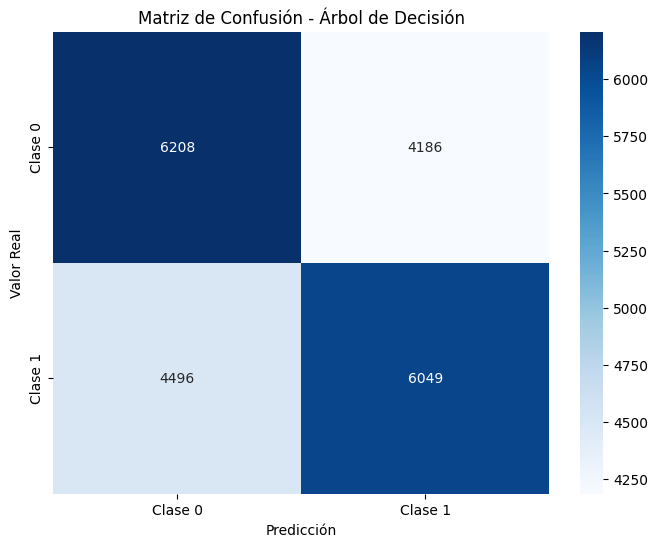

In [ ]:
# prompt: mostrar un grafico de la matriz de confusion del modelo de arbol de decision

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (Your existing code) ...

# Matriz de confusión para Árbol de Decisión
confusion_dt = confusion_matrix(y_mtest, y_pred)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

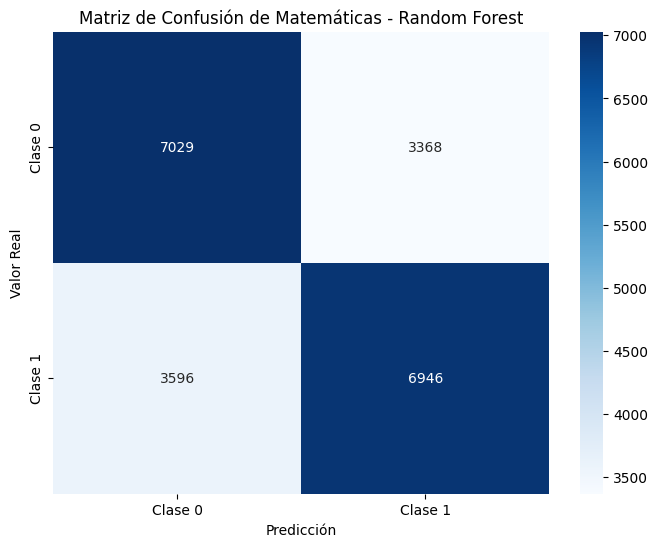

In [ ]:
# prompt: mostrar un grafico de la matriz de confusion del modelo de random forest
import seaborn as sns
# ... (Your existing code) ...
rf_y_pred = rf_clf.predict(X_mtest)

# Matriz de confusión para Random Forest
confusion_rf = confusion_matrix(y_mtest, rf_y_pred)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión de Matemáticas - Random Forest')
plt.show()

**Curva ROC y AUC del modelo**

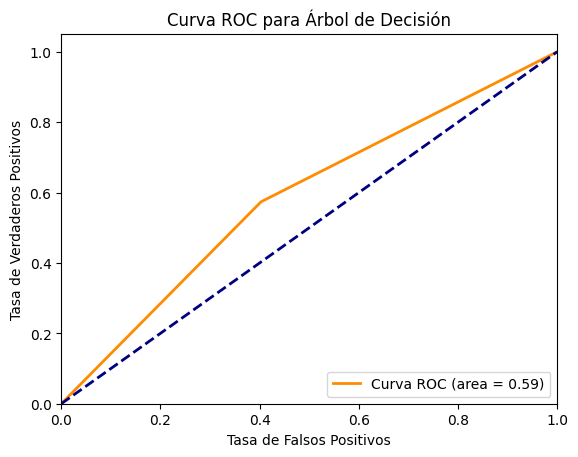

AUC para Árbol de Decisión: 0.5855
----------------------------------------


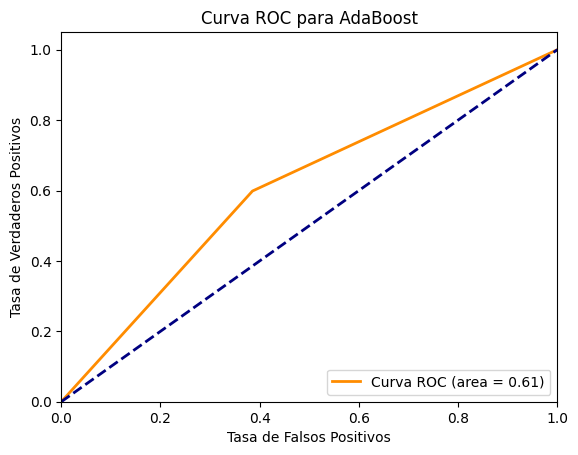

AUC para AdaBoost: 0.6065
----------------------------------------


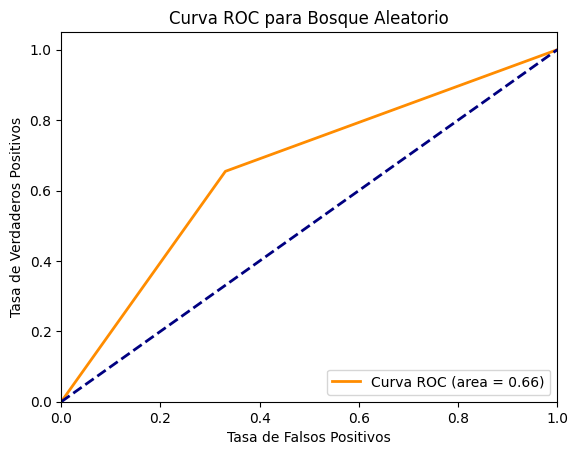

AUC para Bosque Aleatorio: 0.6618
----------------------------------------


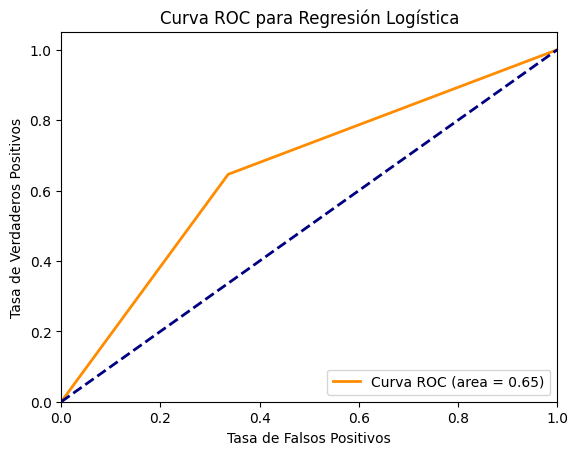

AUC para Regresión Logística: 0.6548
----------------------------------------


In [ ]:
# Lista de modelos a evaluar
modelos = [
    ('Árbol de Decisión', clf, y_pred),
    ('AdaBoost', ada_clf, y_pred_ada),
    ('Bosque Aleatorio', rf_clf, rf_y_pred),
    ('Regresión Logística', logreg_clf, logreg_y_pred)
]

# Bucle para evaluar cada modelo
for nombre_modelo, modelo, y_pred_modelo in modelos:
    fpr, tpr, thresholds = roc_curve(y_mtest, y_pred_modelo)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC para ' + nombre_modelo)
    plt.legend(loc="lower right")
    plt.show()

    print(f"AUC para {nombre_modelo}: {roc_auc:.4f}")
    print("-" * 40)

#Generación del modelo "Resultados lengua"
En esta sección se generan cuatro modelos -Arbol de decisión, Adaboost, Modelo de bosque aleatorio y regresión logística- para predecir si la variable lpuntaje es superior o no al promedio.

##Preparación del dataset
En esta sección se adapta al dataframe para entrenar el modelo de lpuntaje a partir del dataframe unificado.

**Identificar la variable objetivo**

Se elimina la columna lpuntaje, renombrando la columna lpuntaje a "y" y transformandola en un valor binario (0 si es menor que el promedio y 1 si es mayor que el promedio).

In [ ]:
#Creo una copia del dataframe para trabajar en el modelo de mpuntaje
df_lpuntaje = df.copy()

#Identifico la variable como mpuntaje y la renombro como y
df_lpuntaje['y'] = df['lpuntaje'].apply(lambda x: 1 if x >= 500 else 0) #Si es modelo binario
#df_lpuntaje['y'] = df_lpuntaje['lpuntaje'].apply(clasificar_puntaje)

#Borra la columna clase binaria que fue reemplazada
df_lpuntaje.drop('lpuntaje', axis=1, inplace=True)

#Eliminar la columna lpuntaje, que no será utilizada en este dataframe
df_lpuntaje.drop('mpuntaje', axis=1, inplace=True)

In [ ]:
#Obtengo la descripción
df_lpuntaje.describe()

,cod_provincia,sector,ambito,sexo,vive_padre,vive_hermano,habitaciones_en_casa,tiene_auto,tiene_computadora,tiene_tablet,...,motivo_faltas_ganas,motivo_faltas_problemas_clima,motivo_faltas_otros,conflicto_trado_adultos,conflicto_tratado_involucrados,conflicto_tratado_sanciones,padres_extranjeros,personas_en_casa,edad,y
count,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,...,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000,151625.000000
mean,32.212089,1.338882,1.456752,1.514678,0.651291,0.771805,3.318127,0.683568,0.784996,0.364993,...,0.351908,0.276498,0.360706,0.304020,0.624508,0.518681,0.577411,4.589461,17.693388,0.512778
std,29.976258,0.473331,0.498128,0.499786,0.476563,0.419670,1.325189,0.465085,0.410827,0.481430,...,0.477567,0.447267,0.480207,0.459993,0.484251,0.499653,0.493973,1.584232,0.832237,0.499838
min,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
25%,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,17.000000,0.000000
50%,14.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,18.000000,1.000000
75%,58.000000,2.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,18.000000,1.000000
max,94.000000,2.000000,2.000000,2.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,21.000000,1.000000


**Balancear el modelo**

*Se balancea el modelo para que contenga la misma cantidad de alumnos que superaron o no superaron al promedio.*

In [ ]:
# Mostrar cuantos valores en la columna "y" valen 0 o 1
print(df_lpuntaje['y'].value_counts())

y
1    77750
0    73875
Name: count, dtype: int64


In [ ]:
# Contar la cantidad de 0 y 1 en la columna 'y'
conteo_clases = df_lpuntaje['y'].value_counts()

# Calcular cuántos 1 eliminar para reducir a 73875
cantidad_a_eliminar = conteo_clases[1] - 73875

# Obtener los índices de las filas con 'y' igual a 1
indices_ceros = df_lpuntaje[df_lpuntaje['y'] == 1].index

# Seleccionar aleatoriamente los índices a eliminar
indices_a_eliminar = np.random.choice(indices_ceros, cantidad_a_eliminar, replace=False)

# Eliminar las filas seleccionadas del DataFrame
df_lpuntaje = df_lpuntaje.drop(indices_a_eliminar)

# Verificar el nuevo conteo de clases
print(df_lpuntaje["y"].value_counts())

y
1    73875
0    73875
Name: count, dtype: int64


**Detectar columnas irrelevantes**

Se detectan y eliminan todas las columnas que contengan un bajo nivel de correlación con la variable objetivo

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_lpuntaje.corr()

# Get the correlation with the target variable 'y'
correlation_with_y = correlation_matrix['y']

# Find columns with absolute correlation less than 0.1
columns_to_drop = correlation_with_y[abs(correlation_with_y) < 0.05].index

# Print the columns to be dropped and their correlation values
print("Columns to be dropped:")
for col in columns_to_drop:
    print(f"{col}: {correlation_with_y[col]}")

# Drop the columns from the DataFrame
df_lpuntaje = df_lpuntaje.drop(columns=columns_to_drop)

Columns to be dropped:
ambito: -0.0033966381863844352
vive_padre: 0.013918194639855164
vive_hermano: 0.01570515171923572
tiene_tablet: 0.014440694847152697
cuida_familiar: -0.021549225235703323
realiza_tareas_hogar: 0.04275730501028677
dias_trabajo_fuera_casa: -0.03308389551338219
trabaja_remunerado: 0.02557264852844381
fuera_escuela_deporte: -0.022888745822340413
faltas: 0.025172288438490634
motivo_faltas_problemas_clima: 0.032249649193809946
conflicto_trado_adultos: -0.01965570229569035
padres_extranjeros: -0.00643998866491945


**División del dataset en entrenamiento y prueba**

Se divide al dataset en cuatro secciones destinadas al entrenamiento y prueba del modelo, tanto para los valores de entrada como de salida.

In [ ]:
#X es la caracteristica, y es la variable objetivo
Xl = df_lpuntaje.drop('y', axis=1)
yl = df_lpuntaje['y']

#Dividi,os el conjunto de datos en entrenamiento y prueba
X_ltrain, X_ltest, y_ltrain, y_ltest = train_test_split(Xl, yl, test_size=0.2, random_state=42)
# Mostrar cantidad de datos que tiene el conjunto de entrenamiento y de prueba
print("Tamaño del conjunto de entrenamiento:", X_ltrain.shape[0])
print("Tamaño del conjunto de prueba:", X_ltest.shape[0])

Tamaño del conjunto de entrenamiento: 118200
Tamaño del conjunto de prueba: 29550


## Aprendizaje supervisado
En esta sección se define y entrenan los cuatro modelos de aprendizaje capaz de predecir si un alumno supera el puntaje promedio en el examen de lengua.

###Entrenamiento de los modelos
Aquí se entrenan los modelos para la predicción del examen de matemáticas

**Modelo Arbol de decisión**

Aquí se entrena un modelo de Arbol de decisión continuamente hasta encontrar el mejor posible. Al tratarse del primer modelo, presentamos un gráfico que meustra como cambian sus capacidades con un gráfico.

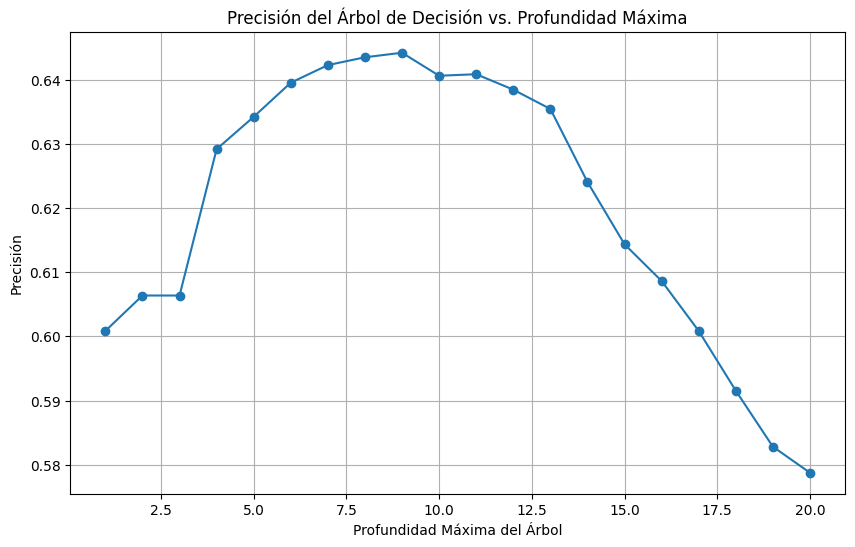

In [ ]:
# prompt: Hacer un árbol de decisión de clasificación para que ajuste el valor de la columna y e ir ajustando los valores de max depth. Crear un gráfico que muestre como cambia la precisión con los cambios de max_depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Lista para almacenar las profundidades máximas y las precisiones
max_depths = list(range(1, 21))  # Profundidades de 1 a 20
accuracies = []

for max_depth in max_depths:
    # Crear y entrenar el modelo de árbol de decisión
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_ltrain, y_ltrain)

    # Realizar predicciones en el conjunto de prueba
    y_pred = clf.predict(X_ltest)

    # Calcular la precisión
    accuracy = accuracy_score(y_ltest, y_pred)
    accuracies.append(accuracy)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel("Profundidad Máxima del Árbol")
plt.ylabel("Precisión")
plt.title("Precisión del Árbol de Decisión vs. Profundidad Máxima")
plt.grid(True)
plt.show()

In [ ]:
# Lista para almacenar las profundidades máximas y las métricas
max_depths = list(range(1, 21))  # Profundidades de 1 a 20
best_accuracy = 0
best_precision = 0
best_f1 = 0
best_recall = 0
best_max_depth = 0

for max_depth in max_depths:
    # Crear y entrenar el modelo de árbol de decisión
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_ltrain, y_ltrain)

    # Realizar predicciones en el conjunto de prueba
    y_pred = clf.predict(X_ltest)

    # Calcular las métricas
    accuracy = accuracy_score(y_ltest, y_pred)
    precision = precision_score(y_ltest, y_pred)
    f1 = f1_score(y_ltest, y_pred)
    recall = recall_score(y_ltest, y_pred)

    print(f"Resultados para max_depth={max_depth}:")
    print(f"  Precisión: {precision}")
    print(f"  Exactitud: {accuracy}")
    print(f"  F1-score: {f1}")
    print(f"  Recall: {recall}")

    # Actualizar la mejor profundidad si se encuentran mejores métricas
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_precision = precision
        best_f1 = f1
        best_recall = recall
        best_max_depth = max_depth
        clf_copy = copy.deepcopy(clf)

print("\nMejores resultados:")
print(f"  Max Depth: {best_max_depth}")
print(f"  Precisión: {best_precision}")
print(f"  Exactitud: {best_accuracy}")
print(f"  F1-score: {best_f1}")
print(f"  Recall: {best_recall}")
clf = clf_copy

Resultados para max_depth=1:
  Precisión: 0.6440694888178914
  Exactitud: 0.6008460236886632
  F1-score: 0.5224116289427866
  Recall: 0.43941148423131937
Resultados para max_depth=2:
  Precisión: 0.6607274644175013
  Exactitud: 0.6063620981387479
  F1-score: 0.5186625837954151
  Recall: 0.4268782780464546
Resultados para max_depth=3:
  Precisión: 0.6607274644175013
  Exactitud: 0.6063620981387479
  F1-score: 0.5186625837954151
  Recall: 0.4268782780464546
Resultados para max_depth=4:
  Precisión: 0.6441124100023226
  Exactitud: 0.62917089678511
  F1-score: 0.6029422421914632
  Recall: 0.5667188883591036
Resultados para max_depth=5:
  Precisión: 0.6214859437751004
  Exactitud: 0.6342131979695431
  F1-score: 0.6469608387497142
  Recall: 0.6746134459505483
Resultados para max_depth=6:
  Precisión: 0.6573705179282868
  Exactitud: 0.6395262267343486
  F1-score: 0.6124008441889237
  Recall: 0.5731898372045501
Resultados para max_depth=7:
  Precisión: 0.6569660861594867
  Exactitud: 0.6422673

**Modelo ADABOOST**

Aquí se entrena un modelo de ADABOOST (con el previo arbol de decisión como base) continuamente hasta encontrar el mejor posible.

In [ ]:
# Lista para almacenar los hiperparámetros y las métricas
n_estimators_list = [50, 100, 150]  # Número de estimadores (árboles)
learning_rates = [0.1, 0.5, 1.0]  # Tasa de aprendizaje

best_accuracy = 0
best_precision = 0
best_f1 = 0
best_recall = 0
best_n_estimators = 0
best_learning_rate = 0

for n_estimators in n_estimators_list:
  for learning_rate in learning_rates:
    # Crear el modelo AdaBoost con el clasificador de árbol de decisión como estimador base
    ada_clf = AdaBoostClassifier(estimator=clf,
                                 n_estimators=n_estimators,
                                 learning_rate=learning_rate,
                                 random_state=42)

    # Entrenar el modelo AdaBoost
    ada_clf.fit(X_ltrain, y_ltrain)

    # Realizar predicciones en el conjunto de prueba
    y_pred_ada = ada_clf.predict(X_ltest)

    # Calcular las métricas del modelo AdaBoost
    accuracy_ada = accuracy_score(y_ltest, y_pred_ada)
    precision_ada = precision_score(y_ltest, y_pred_ada)
    f1_ada = f1_score(y_ltest, y_pred_ada)
    recall_ada = recall_score(y_ltest, y_pred_ada)

    print(f"Resultados para n_estimators={n_estimators}, learning_rate={learning_rate}:")
    print(f"  Precisión: {precision_ada}")
    print(f"  Exactitud: {accuracy_ada}")
    print(f"  F1-score: {f1_ada}")
    print(f"  Recall: {recall_ada}")

    # Actualizar los mejores hiperparámetros si se encuentran mejores métricas
    if accuracy_ada > best_accuracy:
        best_accuracy = accuracy_ada
        best_precision = precision_ada
        best_f1 = f1_ada
        best_recall = recall_ada
        best_n_estimators = n_estimators
        best_learning_rate = learning_rate
        ada_clf_copy = copy.deepcopy(ada_clf)


print("\nMejores resultados:")
print(f"  n_estimators: {best_n_estimators}")
print(f"  learning_rate: {best_learning_rate}")
print(f"  Precisión: {best_precision}")
print(f"  Exactitud: {best_accuracy}")
print(f"  F1-score: {best_f1}")
print(f"  Recall: {best_recall}")
ada_clf = ada_clf_copy

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=50, learning_rate=0.1:
  Precisión: 0.6452776265650517
  Exactitud: 0.6476818950930626
  F1-score: 0.6456071076011846
  Recall: 0.6459369252775696


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=50, learning_rate=0.5:
  Precisión: 0.6226713185438747
  Exactitud: 0.6293062605752962
  F1-score: 0.6333020889126941
  Recall: 0.6443021592534568


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=50, learning_rate=1.0:
  Precisión: 0.6015371364208574
  Exactitud: 0.6069035532994924
  F1-score: 0.6098609525089004
  Recall: 0.6184183638716708


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=100, learning_rate=0.1:
  Precisión: 0.6428812757618758
  Exactitud: 0.6462944162436548
  F1-score: 0.6454545454545455
  Recall: 0.6480484980587153


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=100, learning_rate=0.5:
  Precisión: 0.6071170163783464
  Exactitud: 0.6134010152284264
  F1-score: 0.6177218578503547
  Recall: 0.6287037667733806


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=100, learning_rate=1.0:
  Precisión: 0.5887231623302789
  Exactitud: 0.5929610829103215
  F1-score: 0.5940874730021598
  Recall: 0.5995504393433689


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=150, learning_rate=0.1:
  Precisión: 0.6368336242782329
  Exactitud: 0.6411167512690356
  F1-score: 0.6414201183431952
  Recall: 0.646073155779579


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=150, learning_rate=0.5:
  Precisión: 0.6043303188329263
  Exactitud: 0.6101522842639594
  F1-score: 0.6138115990613476
  Recall: 0.6235951229480281


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Resultados para n_estimators=150, learning_rate=1.0:
  Precisión: 0.5840731772935163
  Exactitud: 0.5877834179357022
  F1-score: 0.5877694676638804
  Recall: 0.5915128397248144

Mejores resultados:
  n_estimators: 50
  learning_rate: 0.1
  Precisión: 0.6452776265650517
  Exactitud: 0.6476818950930626
  F1-score: 0.6456071076011846
  Recall: 0.6459369252775696


**Modelo bosque aleatorio**

Aquí se entrena un modelo de bosque aleatorio continuamente hasta encontrar el mejor posible.

In [ ]:
# Lista para almacenar los hiperparámetros y las métricas
n_estimators_list = [100, 300, 500]  # Número de árboles
max_depths = [None, 10, 20]  # Profundidad máxima de los árboles
min_samples_splits = [2, 5, 10]  # Mínimo número de muestras para dividir un nodo

best_accuracy = 0
best_precision = 0
best_f1 = 0
best_recall = 0
best_n_estimators = 0
best_max_depth = None
best_min_samples_split = 0

for n_estimators in n_estimators_list:
  for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
      # Crear y entrenar el modelo de Bosque Aleatorio con los hiperparámetros actuales
      rf_clf = RandomForestClassifier(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      random_state=42)
      rf_clf.fit(X_ltrain, y_ltrain)

      # Realizar predicciones en el conjunto de prueba
      rf_y_pred = rf_clf.predict(X_ltest)

      # Calcular las métricas
      rf_accuracy = accuracy_score(y_ltest, rf_y_pred)
      rf_precision = precision_score(y_ltest, rf_y_pred)
      rf_f1 = f1_score(y_ltest, rf_y_pred)
      rf_recall = recall_score(y_ltest, rf_y_pred)

      print(f"Resultados para n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}:")
      print(f"  Precisión: {rf_precision}")
      print(f"  Exactitud: {rf_accuracy}")
      print(f"  F1-score: {rf_f1}")
      print(f"  Recall: {rf_recall}")

      # Actualizar los mejores hiperparámetros si se encuentran mejores métricas
      if rf_accuracy > best_accuracy:
          best_accuracy = rf_accuracy
          best_precision = rf_precision
          best_f1 = rf_f1
          best_recall = rf_recall
          best_n_estimators = n_estimators
          best_max_depth = max_depth
          best_min_samples_split = min_samples_split
          rf_clf_copy = copy.deepcopy(rf_clf)

print("\nMejores resultados:")
print(f"  n_estimators: {best_n_estimators}")
print(f"  max_depth: {best_max_depth}")
print(f"  min_samples_split: {best_min_samples_split}")
print(f"  Precisión: {best_precision}")
print(f"  Exactitud: {best_accuracy}")
print(f"  F1-score: {best_f1}")
print(f"  Recall: {best_recall}")
rf_clf = rf_clf_copy

Resultados para n_estimators=100, max_depth=None, min_samples_split=2:
  Precisión: 0.6452095808383234
  Exactitud: 0.6378003384094755
  F1-score: 0.6284325637910085
  Recall: 0.6125059213642823
Resultados para n_estimators=100, max_depth=None, min_samples_split=5:
  Precisión: 0.6532144862436833
  Exactitud: 0.6476818950930626
  F1-score: 0.6413092161929371
  Recall: 0.6298301414360155
Resultados para n_estimators=100, max_depth=None, min_samples_split=10:
  Precisión: 0.6591197630131189
  Exactitud: 0.6526226734348561
  F1-score: 0.6454843723018477
  Recall: 0.6324017053529133
Resultados para n_estimators=100, max_depth=10, min_samples_split=2:
  Precisión: 0.6646744930629669
  Exactitud: 0.6565820642978003
  F1-score: 0.6480299667036626
  Recall: 0.6321986871489477
Resultados para n_estimators=100, max_depth=10, min_samples_split=5:
  Precisión: 0.6645225843339051
  Exactitud: 0.655736040609137
  F1-score: 0.64639021168619
  Recall: 0.6292210868241186
Resultados para n_estimators=10

**Modelo de regresión logística**

Aquí se entrena un modelo de regresión logística continuamente hasta encontrar el mejor posible.

In [ ]:
# Lista de valores de C a probar
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

best_accuracy = 0
best_precision = 0
best_f1 = 0
best_recall = 0
best_C = 0

for C in C_values:
  # Crear y entrenar el modelo de regresión logística con el valor actual de C
  logreg_clf = LogisticRegression(C=C, max_iter=1000, random_state=42)
  logreg_clf.fit(X_ltrain, y_ltrain)

  # Realizar predicciones en el conjunto de prueba
  logreg_y_pred = logreg_clf.predict(X_ltest)

  # Calcular las métricas
  logreg_accuracy = accuracy_score(y_ltest, logreg_y_pred)
  logreg_precision = precision_score(y_ltest, logreg_y_pred)
  logreg_f1 = f1_score(y_ltest, logreg_y_pred)
  logreg_recall = recall_score(y_ltest, logreg_y_pred)

  print(f"Resultados para C={C}:")
  print(f"  Precisión: {logreg_precision}")
  print(f"  Exactitud: {logreg_accuracy}")
  print(f"  F1-score: {logreg_f1}")
  print(f"  Recall: {logreg_recall}")

  # Actualizar el mejor valor de C si se encuentran mejores métricas
  if logreg_accuracy > best_accuracy:
      best_accuracy = logreg_accuracy
      best_precision = logreg_precision
      best_f1 = logreg_f1
      best_recall = logreg_recall
      best_C = C
      logreg_clf_copy = copy.deepcopy(logreg_clf)

print("\nMejores resultados:")
print(f"  C: {best_C}")
print(f"  Precisión: {best_precision}")
print(f"  Exactitud: {best_accuracy}")
print(f"  F1-score: {best_f1}")
print(f"  Recall: {best_recall}")
logreg_clf = logreg_clf_copy

Resultados para C=0.001:
  Precisión: 0.6468414208473068
  Exactitud: 0.6483925549915398
  F1-score: 0.6452956438618053
  Recall: 0.6437572372454192
Resultados para C=0.01:
  Precisión: 0.6465907531897379
  Exactitud: 0.6478172588832487
  F1-score: 0.6443145698759356
  Recall: 0.6420543559703018
Resultados para C=0.1:
  Precisión: 0.6469901846386162
  Exactitud: 0.6481218274111675
  F1-score: 0.6445128205128206
  Recall: 0.6420543559703018
Resultados para C=1:
  Precisión: 0.6471032399780341
  Exactitud: 0.6482233502538071
  F1-score: 0.6446032342986086
  Recall: 0.6421224712213065
Resultados para C=10:
  Precisión: 0.6471234381436222
  Exactitud: 0.6482233502538071
  F1-score: 0.6445789311724279
  Recall: 0.6420543559703018
Resultados para C=100:
  Precisión: 0.6470305526948164
  Exactitud: 0.6481218274111675
  F1-score: 0.6444642002325104
  Recall: 0.6419181254682923

Mejores resultados:
  C: 0.001
  Precisión: 0.6468414208473068
  Exactitud: 0.6483925549915398
  F1-score: 0.64529564

###Obtener métricas
En esta sección se obtienen todas las métricas de los cuatro modelos para comprobar cual es el mejor

**Matriz de validación**

In [ ]:
# Matriz de confusión para Árbol de Decisión
confusion_dt = confusion_matrix(y_ltest, y_pred)
print("Matriz de confusión para Árbol de Decisión:")
print(confusion_dt)

# Matriz de confusión para AdaBoost
confusion_ada = confusion_matrix(y_ltest, y_pred_ada)
print("\nMatriz de confusión para AdaBoost:")
print(confusion_ada)

# Matriz de confusión para Random Forest
confusion_rf = confusion_matrix(y_ltest, rf_y_pred)
print("\nMatriz de confusión para Random Forest:")
print(confusion_rf)

# Matriz de confusión para Regresión Logística
confusion_logreg = confusion_matrix(y_ltest, logreg_y_pred)
print("\nMatriz de confusión para Regresión Logística:")
confusion_logreg

Matriz de confusión para Árbol de Decisión:
[[8664 6205]
 [6243 8438]]

Matriz de confusión para AdaBoost:
[[8685 6184]
 [5997 8684]]

Matriz de confusión para Random Forest:
[[9883 4986]
 [5271 9410]]

Matriz de confusión para Regresión Logística:


array([[9728, 5141],
       [5257, 9424]])

**CrossEntropyValidation**

In [ ]:
# Lista de modelos a evaluar
modelos = [
    ('Árbol de Decisión', clf),
    ('AdaBoost', ada_clf),
    ('Bosque Aleatorio', rf_clf),
    ('Regresión Logística', logreg_clf)
]

# Bucle para evaluar cada modelo
for nombre_modelo, modelo in modelos:
  scores = cross_val_score(modelo, Xl, yl, cv=5, scoring='accuracy')  # 5-fold cross-validation
  print(f"Resultados de validación cruzada para {nombre_modelo}:")
  print(f"Precisión promedio: {scores.mean():.4f}")
  print(f"Desviación estándar: {scores.std():.4f}")
  print("-" * 40)

Resultados de validación cruzada para Árbol de Decisión:
Precisión promedio: 0.6310
Desviación estándar: 0.0142
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Resultados de validación cruzada para AdaBoost:
Precisión promedio: 0.6275
Desviación estándar: 0.0123
----------------------------------------
Resultados de validación cruzada para Bosque Aleatorio:
Precisión promedio: 0.6514
Desviación estándar: 0.0049
----------------------------------------
Resultados de validación cruzada para Regresión Logística:
Precisión promedio: 0.6427
Desviación estándar: 0.0063
----------------------------------------


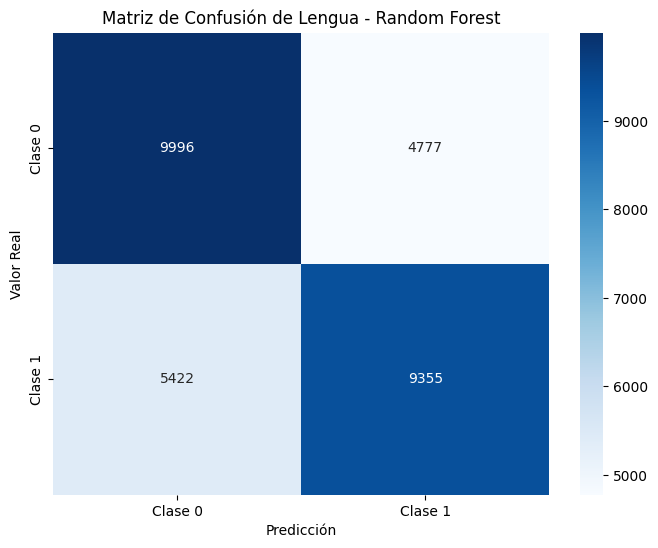

In [ ]:
# prompt: necesito un grafico de la matriz de confusion para el modelo de random forest

# Matriz de confusión para Random Forest
confusion_rf = confusion_matrix(y_ltest, rf_y_pred)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión de Lengua - Random Forest')
plt.show()

**Curva ROC y AUC del modelo**

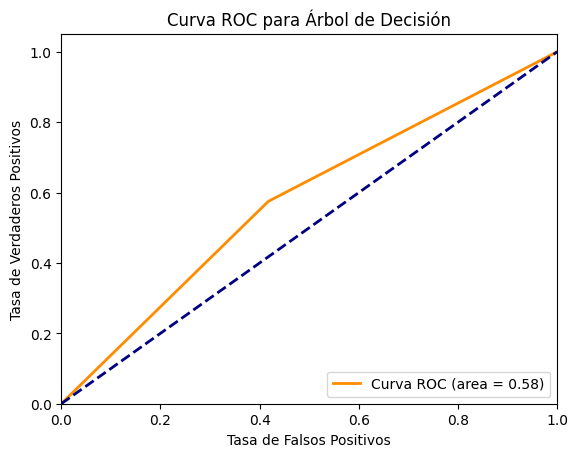

AUC para Árbol de Decisión: 0.5787
----------------------------------------


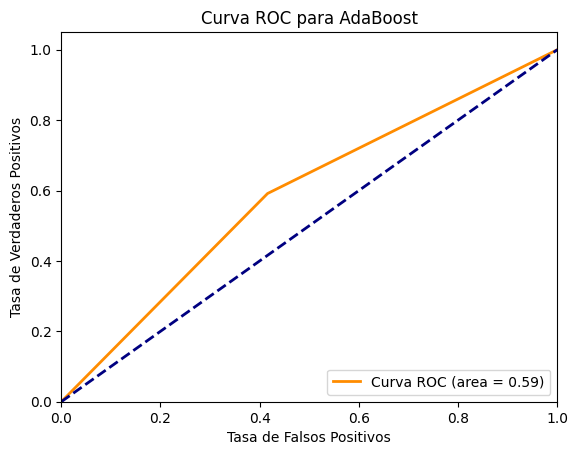

AUC para AdaBoost: 0.5878
----------------------------------------


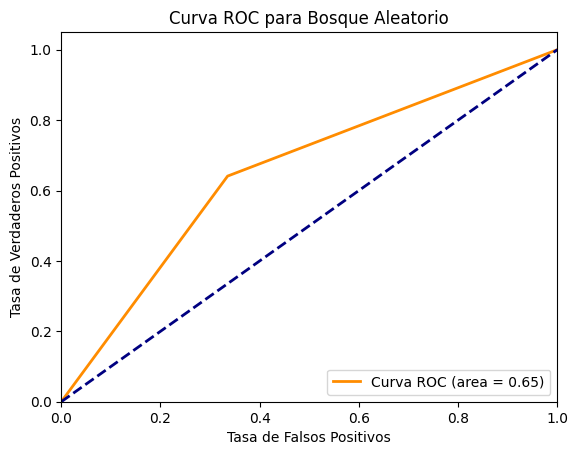

AUC para Bosque Aleatorio: 0.6528
----------------------------------------


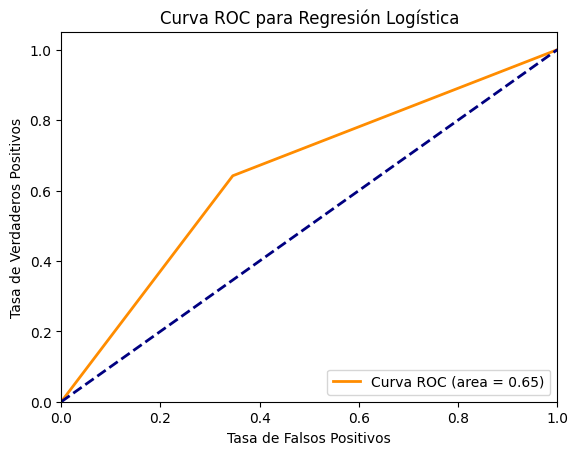

AUC para Regresión Logística: 0.6481
----------------------------------------


In [ ]:
# Lista de modelos a evaluar
modelos = [
    ('Árbol de Decisión', clf, y_pred),
    ('AdaBoost', ada_clf, y_pred_ada),
    ('Bosque Aleatorio', rf_clf, rf_y_pred),
    ('Regresión Logística', logreg_clf, logreg_y_pred)
]

# Bucle para evaluar cada modelo
for nombre_modelo, modelo, y_pred_modelo in modelos:
    fpr, tpr, thresholds = roc_curve(y_ltest, y_pred_modelo)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC para ' + nombre_modelo)
    plt.legend(loc="lower right")
    plt.show()

    print(f"AUC para {nombre_modelo}: {roc_auc:.4f}")
    print("-" * 40)